# PA005: High Value Customer Identification (Insiders)

# Planning the solution

## Input

1. Business problem:  
    * Select valuable clients to make up a loyalty program.  

2. Data  
    * E-commerce sales over a year period.

## Output

1. Identify customers that will be part of a loyalty program: Insiders.  
    - List: client_id | is_insider |  
    
            10323 | yes/l  
            23413 | no/l  

2. Relatório com as respostas das perguntas de negócio.  

        1. Who are the eligible customers to be part of the program Insiders?  
        2. How many clients will be part of the group?  
        3. What are the main characteristics of these clients?  
        4. What is the percentage contribution for the revenue coming from the Insiders?  
        5. What is the revenue expectation for this group for the upcoing months?  
        6. What are the elegibility conditions for a person to be part of the Insiders?  
        7. What are the conditions for a person to be excluded from the Insiders?  
        8. What guarantees the Insiders are better than the rest of the base?  
        9. What actions the marketing team should make to increase revenue?

## Tasks

1. Who are the eligible customers to be part of the program Insiders?  
    - What are eligible clients? What are high-valued clients?  
    - Revenue:  
        - High average ticket:  
        - High LTV  
        - Low recency  
        - High basket size  
        - Low CHURN probability  
        - High LTV forecast
        - High purchase propensity


    - Cost:  
        - Low return ratio  

    - Purchase experience:  
        - High mean evaluation  
        

2. How many clients will be part of the group?  
    - Total number of clients  
    - % from the Insiders group  


3. What are the main characteristics of these clients?  
    - What are the characteristics of the clients?  
        - Age  
        - Location

    - What are the purchasing characteristics  
        - Clustering atributes  

4. What is the percentage contribution for the revenue coming from the Insiders?  
    - Yearly revenue  
    - Insiders revenue  

5. What is the revenue expectation for this group for the upcoing months?  
    - LTV from Insiders group  
    - Cohort analysis  

6. What are the elegibility conditions for a person to be part of the Insiders?  
    - Determine the periodicity  to update the model ( 1 month, 3 months)  
    - A person must be similar to those people of the group  
    

7. What are the conditions for a person to be excluded from the Insiders?  
    - Determine the periodicity ( 1 month, 3 months)  
    - The person must be dissimilar to a person of the group  

8. What guarantees the Insiders are better than the rest of the base?  
    - A/B test  
    - Bayesian A/B test  
    - Hypothesis test  

9. What actions the marketing team should make to increase revenue?  
    - Discount  
    - Purchasing preference  
    - Front  
    - Company visiting  



## Solution Benchmarks

### 1. Desk research  

* Involves research how other people are solving a similar problem.  


**RFM Model**  

1. Recency  
    a. Time since last purchase  
    b. Responsivity  

2. Frequency  
    a. Mean time between transactions  
    b. Engagement  


3. Monetary  
    a. Total spent, revenue  
    b. 'High-value purchases'  


**Recency score**  
1. Step 1:  
    a. Order clients by recency

2. Step 2:  
    a. Divide the client based on their score  
        i. Scores from 1 to 5  
        ii. 5 groups of 20%  

3. Step 3:  
    a. Order clients by frequency  

4. Step 4:  
    a. Rate the scores  

5. Step 5:  
    a. Order clients by monetary  

6. Step 6:  
    a. Rate the scores 

7. Step 7:  
    a. Calculate teh average scores for recency, frequency, and monetary    

8. Step 8:  
    a. Rate the scores 



![](../images/rfm_model.png)

**RFM Model analysis**

1. Champions  
    a. Recent purchases, often high-valued products;  
    b. Offer awards to these customers.  

2. Potential loyalists  
    a. Recent purchases, good buying frequency and value spent;  
    b. Loyalty and upsell programs.

3. New customers
    a. Recent purchase, low frequency;  
    Relationship building, special offers.  

4. At Risk customers  
    a. "Long time since last purchase";  
    b. Reactivation, offers, and products campaigns.

5. Can't lose them.  

Insights from RFM model  
1. Who are your best customers?  
2. Which customers are close to churn?  
3. Which are potential clients to get into the loyalty program?  
4. Which customers need to be retained?
5. Which clients most likely will respond to marketing campaigns?

# 0.0 IMPORTS

In [1]:
import numpy    as np
import pandas   as pd
import seaborn  as sns

from matplotlib     import pyplot   as plt
from IPython.display import HTML

from sklearn import cluster as c
from sklearn import metrics as m

from plotly import express as px

## 0.1. Auxiliary functions

In [2]:
def nb_settings():
    %matplotlib inline
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [24,9]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.container{width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)

    sns.set()

nb_settings()

## Load data

In [26]:
df_raw = pd.read_csv('../../data/Ecommerce.csv', encoding='unicode_escape') #this dataset presented an encoding issue so that the encoding part in the code.
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis = 1)
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0. DATA DESCRIPTION

In [27]:
df1 = df_raw.copy()

## 1.1. Data Dimension

In [28]:
print(f'Number of rows: {df1.shape[0]}\nNumber of columns: {df1.shape[1]}')

Number of rows: 541909
Number of columns: 8


## 1.2. Rename Columns

In [29]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [30]:
cols_new = [
    "invoice_no",
    "stock_code",
    "description",
    "quantity",
    "invoice_date",
    "unit_price",
    "customer_id",
    "country",
]

In [31]:
df1.columns = cols_new

## 1.3. Check NA's

In [32]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.4. Replace NA's

In [33]:
# Remove NA
df1 = df1.dropna(subset=['description','customer_id'])
print(f'Removed data: {1-(df1.shape[0]/df_raw.shape[0]):.2f}')
print(f'Data after removing: {df1.shape}')

Removed data: 0.25
Data after removing: (406829, 8)


## 1.5. Data Types

In [34]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 1.6. Change dtypes

In [38]:
# Invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

#Customer ID
df1.loc[:,'customer_id'] = df1['customer_id'].astype(int)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


## 1.7. Desriptive Statistics

# 2.0. FEATURE ENGINEERING

In [40]:
df2 = df1.copy()

In [41]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom


In [42]:
# 1 - Create a reference table:
df_ref = pd.DataFrame(df2['customer_id'])
df_ref = df_ref.drop_duplicates(ignore_index=True)
df_ref.head()

,customer_id
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [43]:
# 2 - Create a gross revenue feature (quantity * price)

df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# 2.1. - Calculate the monetary
df_monetary = df2[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()

df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum()

customer_id      0
gross_revenue    0
dtype: int64

In [44]:
# 3 - Create a recency feature - day of the last purchase
df_recency = df2[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id','recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum()


customer_id      0
gross_revenue    0
recency_days     0
dtype: int64

In [45]:
# 4 - Create a Frequency feature
df_freq = df2[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
dtype: int64

In [46]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850.0,5288.63,302,35
1,13047.0,3079.10,31,18
2,12583.0,7187.34,2,18
3,13748.0,948.25,95,5
4,15100.0,635.10,330,6


# 3.0. FEATURE FILTERING

# 4.0. EXPLOARTORY DATA ANALYSIS (EDA)

# 5.0. DATA PREPARATION

# 6.0. FEATURE SELECTION

# 7.0. HYPERPARAMETER FINE-TUNING

In [47]:
X = df_ref.copy()

In [48]:
X.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850.0,5288.63,302,35
1,13047.0,3079.10,31,18
2,12583.0,7187.34,2,18
3,13748.0,948.25,95,5
4,15100.0,635.10,330,6


In [49]:
X = X.drop(columns=['customer_id'], axis=1)
X.head()

,gross_revenue,recency_days,invoice_no
0,5288.63,302,35
1,3079.10,31,18
2,7187.34,2,18
3,948.25,95,5
4,635.10,330,6


In [50]:
# Choose the number of clusters
clusters = [2,3,4,5,6]

## 7.1. Within-cluster sum of squares (WSS)

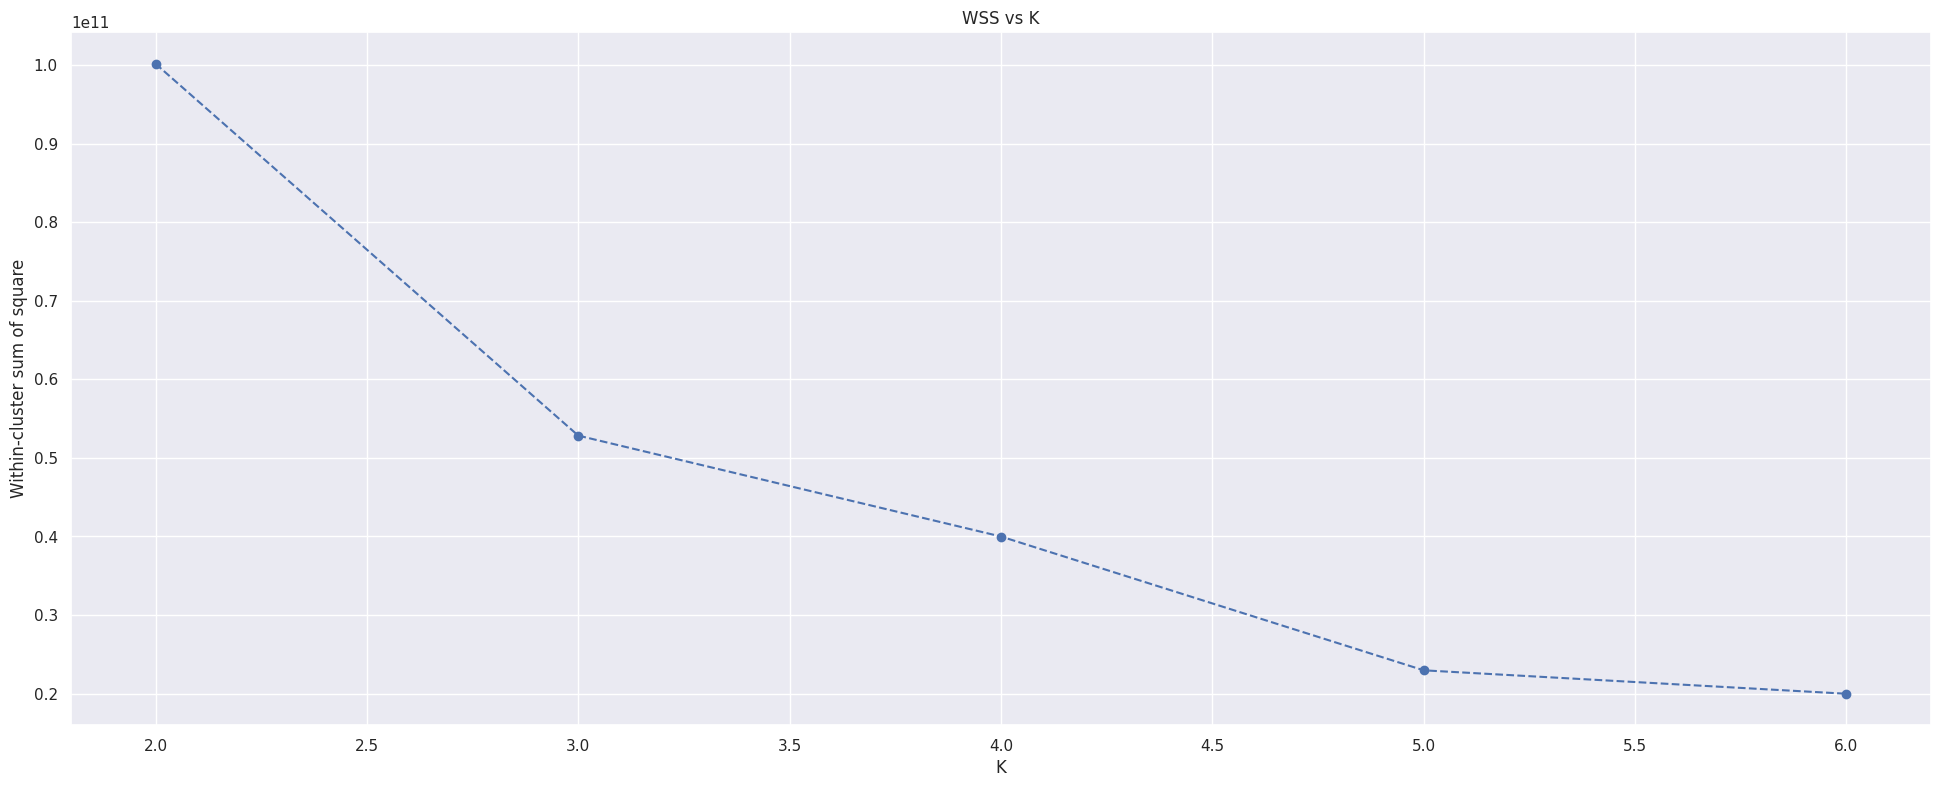

In [51]:
wss = []
for k in clusters:
    # Model definition
    kmeans = c.KMeans (init = 'random', n_clusters = k, n_init = 10, max_iter = 300)
    
    # Model training
    kmeans.fit(X)

    # validation
    wss.append(kmeans.inertia_)

#Plot WSS - Elbow method
plt.plot(clusters, wss, linestyle = '--', marker = 'o', color='b')
plt.xlabel('K');
plt.ylabel('Within-cluster sum of square');
plt.title('WSS vs K');

In [52]:
from yellowbrick.cluster import KElbowVisualizer

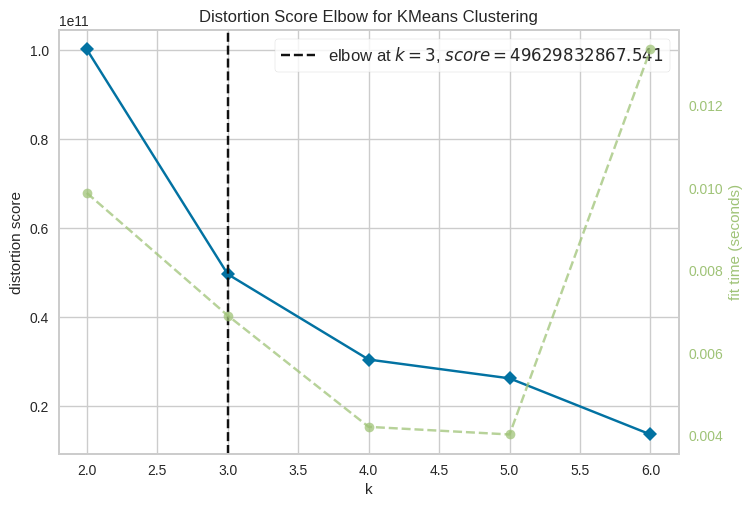

In [53]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timing=False)
kmeans.fit(X)
kmeans.show();

## 7.2. Silhouette Score (SS)

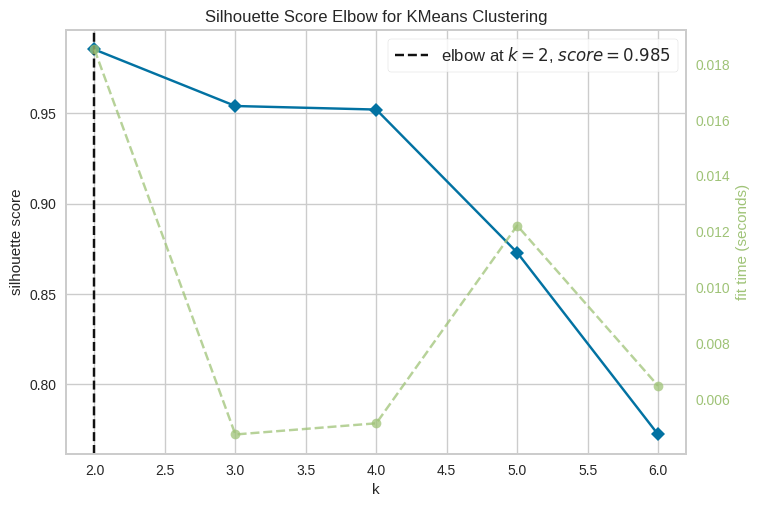

In [54]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric = 'silhouette', timing=False)
kmeans.fit(X)
kmeans.show();

# 8.0. MODEL TRAINING

## 8.1. K-Means

In [55]:
# Model definition
k = 3
kmeans = c.KMeans(init = 'random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# Model training
kmeans.fit(X)

# Clustering
labels = kmeans.labels_


## 8.2. Cluster Validation

In [56]:
# WSS
print(f'WSS score: {kmeans.inertia_}')
# Silhouette score
print(f'Silhouette Score:{m.silhouette_score(X, labels, metric="euclidean")}')

WSS score: 52830442008.00694
Silhouette Score:0.9494677566681542


# 9.0. CLUSTER ANALYSIS

In [57]:
df9 = df_ref.copy()
df9['clusters'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,clusters
0,17850.0,5288.63,302,35,0
1,13047.0,3079.10,31,18,0
2,12583.0,7187.34,2,18,0
3,13748.0,948.25,95,5,0
4,15100.0,635.10,330,6,0


## 9.1. Visual inspection

In [58]:

fig = px.scatter_3d (df9, x='recency_days', y='invoice_no', z='gross_revenue', color = 'clusters')
fig.show();

## 9.2. Cluster Profile

In [69]:
# Number of customer
df_cluster = df9[['customer_id','clusters']].groupby('clusters').count().reset_index()
df_cluster['perc_cust'] = np.round(100*(df_cluster['customer_id']/df_cluster['customer_id'].sum()),2)

# Avg gross revenue
df_avg_gross_rev = np.round(df9[['gross_revenue','clusters']].groupby('clusters').mean().reset_index(), 2)
df_cluster = pd.merge(df_cluster, df_avg_gross_rev, how='left', on='clusters')

# Avg recency days
df_avg_recency = np.round(df9[['recency_days','clusters']].groupby('clusters').mean().reset_index(), 2)
df_cluster = pd.merge(df_cluster, df_avg_recency, how='left', on='clusters')

# Avg invoice_no
df_avg_invoice_no = np.round(df9[['invoice_no','clusters']].groupby('clusters').mean().reset_index(), 2)
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='left', on='clusters')

In [70]:
df_cluster

,clusters,customer_id,perc_cust,gross_revenue,recency_days,invoice_no
0,0,4335,99.15,1372.58,92.26,4.61
1,1,6,0.14,182181.98,7.17,89.00
2,2,31,0.71,40543.52,13.29,53.29


The resulting modeling returned 3 clusters. From these, ~ 99% of the customer base compose only one cluster whereas the remaining customers represent less than one percent of the base each.

# 10.0. DEPLOY TO PRODUCTION